In [1]:
import os
import random

import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
sns.set(font_scale=2.5) 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Random seed
np.random.seed(7)
random.seed(7)
random_state=7

In [3]:
train = pd.read_csv('./datasets/train.csv')

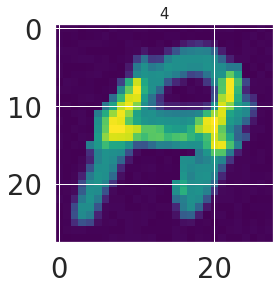

In [4]:
# 영어글자 A, 숫자 4라는 데이터를 이용해 데이터 증강 시도

img = train.query("letter == 'A'")[[(str(i)) for i in range(784)]].iloc[28].values.reshape(28, 28)
plt.imshow(img, cmap='viridis')
plt.title(train.query("letter == 'A'").iloc[28]['digit'], fontsize=15)
plt.show()

In [5]:
def K_means(img, cluster):
    
    #입력 데이터를 단일 열(column) 벡터로 구성 후 float32 타입으로 변경
    # 각 특징은 열로 정렬되어 있어야 K mean 함수 사용가능
    img_flatten = img.reshape((-1,1))
    img_flatten = np.float32(img_flatten)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = cluster
    ret,label,center=cv2.kmeans(img_flatten, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape(28,28)
    
    # digit에 해당하는 부분만을 mask로 생성
    mask_hole=np.array(center).max() # digit 부분은 항상 max value이다.

    return res, mask_hole

In [6]:
# 원본이미지가 입력되었을 때 Segmentation된 이미지의 digt 부분을 0마스크로 만드는 함수 생성
# mode가 mask_0일땐 digit가 0 배경이 1인 마스크 생성, 그 외는 digit이 1 배경이 0인 마스크 생성

def digit_mask(img, cluster, mode='mask_0'):
    
    res, mask_hole = K_means(img, cluster)

    # mask-mode setting
    if mode == 'mask_0':
        res = np.where(res==mask_hole, 0, 1) # digit 부분은 0, 나머지 배경은 1
    else:
        res = np.where(res==mask_hole, 1, 0)
        
    return res

In [7]:
mask_0 = digit_mask(img, mode='mask_0')

mask_0

# plt.imshow(mask_0, cmap='viridis')
# plt.show()

TypeError: digit_mask() missing 1 required positional argument: 'cluster'

In [8]:
mask_1 = digit_mask(img, mode='mask_1')

plt.imshow(mask_1, cmap='viridis')
plt.show()

TypeError: digit_mask() missing 1 required positional argument: 'cluster'

In [9]:
alphabet = 'A'
a="letter =="
b= '"' + alphabet + '"'
letter = train.query(a+b)
letter

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
17,18,7,A,2,3,0,4,0,0,1,...,1,2,0,0,1,0,2,2,1,4
44,45,5,A,2,0,4,2,3,1,3,...,3,1,2,0,4,2,3,4,1,1
75,76,7,A,1,0,4,1,4,1,1,...,0,4,0,4,3,2,4,1,2,2
105,106,2,A,4,2,4,1,0,4,3,...,0,2,0,2,4,3,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,1965,1,A,3,2,0,3,0,2,1,...,3,4,3,1,4,4,1,2,3,2
1967,1968,5,A,0,2,0,0,3,1,3,...,1,1,2,2,3,0,3,1,4,2
2010,2011,9,A,3,1,1,1,0,1,4,...,1,0,3,0,4,3,1,0,2,3
2011,2012,9,A,4,3,3,0,3,0,2,...,4,2,0,1,3,3,4,0,1,3


In [10]:
count = (train['letter']==alphabet).value_counts()[True]
count

72

In [11]:
def letter_generate(alphabet):
    
    letter = train.query("letter =="+ '"' + alphabet + '"')
    
    # 각 알파벳에 몇 개의 데이터가 있는지 갯수를 센다.
    count = (train['letter']==alphabet).value_counts()[True]
    
    # 평균 알파벳 이미지의 영행렬을 생성
    new_letter = np.zeros((28,28))

    
    for i in range(0, count):
        
        img = letter.iloc[i, 3:].values.reshape(28, 28)

        res, mask_hole = K_means(img, 3)
        res = np.where(res==mask_hole, 0, 1)
        
        masked_img = img*res

        # 구멍뚫린 letter 이미지를 모두 더한다.
        new_letter = new_letter + masked_img

        
    new_letter = (new_letter/(count/2)).astype(int)
    
    return new_letter


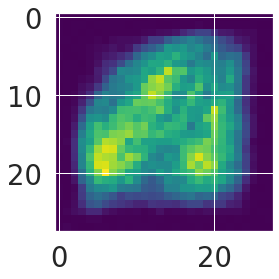

In [12]:
A = 'A'

A_mean = letter_generate(A)

plt.imshow(A_mean, cmap='viridis')
plt.show()

In [13]:
num=4
num_str=str(num)

digit = train.query("digit =="+ '"' + num_str + '"')
digit

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
24,25,4,U,2,2,3,3,2,0,0,...,4,2,2,4,0,2,3,2,4,0
37,38,4,K,0,4,4,3,4,0,1,...,3,0,0,0,1,3,4,4,0,1
59,60,4,Y,4,3,2,0,3,4,4,...,4,2,4,2,3,1,1,0,1,1
66,67,4,R,2,0,3,4,1,0,3,...,4,4,2,4,0,4,4,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,2001,4,I,2,2,3,4,2,1,3,...,0,1,1,3,0,1,3,3,1,0
2007,2008,4,B,1,3,2,0,1,1,2,...,3,1,3,0,0,3,1,3,3,0
2030,2031,4,S,0,1,4,1,3,0,1,...,3,2,3,3,4,2,3,4,3,4
2036,2037,4,M,3,3,4,2,4,1,4,...,3,1,0,4,2,0,3,4,1,3


In [14]:
def digit_seg(num,sample):
    
    # lst_digit
    num_str = str(num)
    digit = train.query("digit =="+ '"' + num_str + '"')
    count_num = (train['digit']==num).value_counts()[True]
    
    
    lst_digit = []
    temp_digit = np.zeros((28,28))
    
    # sample은 3개가 존재, 인덱스는 0,1,2까지 존재, 0,1만 계산하고 2에서 멈춤
    for index_1, value_1 in enumerate(sample):     
        
        img = digit.iloc[value_1, 3:].values.reshape(28, 28)

        res, mask_hole = K_means(img, 3)
        res = np.where(res==mask_hole, img, 0)

        temp_digit = temp_digit + res
        
        
        
        if index_1 == 29:    #if index_1!=0 and index_1%9 == 0:         
            
            temp_digit = temp_digit.ravel()
            
            
            # 30개의 digit 조각을 더한 이미지에 대한 전처리를 해준다.
            for index_2, value_2 in enumerate(temp_digit):
                
                # 값을 다 더해도 100이하인 부분은 무의미한 digit로 예상하고 삭제한다.
                if temp_digit[index_2] < 100:
                    temp_digit[index_2] = 0
                
                # 값을 다 더해서 지나치게 큰 값을 형성했기 때문에 255이하로 나타내도록 적당히 나눠준다.
                temp_digit[index_2] = int(value_2/9)
            
            for index_3, value_3 in enumerate(temp_digit):
                # 적당히 나눠준 후에도 발생한 의미없는 값에 대해 삭제한다.
                 if temp_digit[index_3] < 100:
                    temp_digit[index_3] = 0
                
                # 지나치게 큰값도 삭제해 준다.
                 if temp_digit[index_3] > 255:
                    temp_digit[index_3] = 255
                    
            
            temp_digit = temp_digit.reshape(28,28)
            
            
            res, mask_hole = K_means(temp_digit, 2)
            res = np.where(res==mask_hole, temp_digit, 0)
                        
            
            lst_digit.append(temp_digit)
            temp_digit = np.zeros((28,28))

    return res

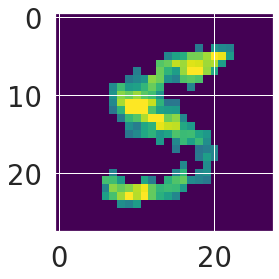

In [15]:
num = 5
count_num= 70
sample = random.sample(range(count_num), 30) # 마지막 세번 째는 어차피 삭제된다.


result = np.array(digit_seg(num, sample)).astype(int)

result =result.reshape(28, 28)
# result = result.ravel()

# for index, value in enumerate(result):
#     if value < 120:
#         result[index] = 0




# result
plt.imshow(result, cmap='viridis')
plt.show()

In [16]:
new_mask_1 = digit_mask(result, mode='mask_1')
new_letter_hole = new_mask_1

plt.imshow(new_letter_hole, cmap='viridis')
plt.show()

TypeError: digit_mask() missing 1 required positional argument: 'cluster'

In [17]:
lst_alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 
                'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
lst_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [18]:
# for i in lst_alpahbet;

# 입력된 모든 알파벳에 대한 숫자 num의 데이터생성
def new_data(alphabet, num):
    
    letter = train.query("letter =="+ '"' + alphabet + '"')
    count_letter = (train['letter']==alphabet).value_counts()[True]
    
    num_str = str(num)
    digit = train.query("digit =="+ '"' + num_str + '"')
    count_num = (train['digit']==num).value_counts()[True]
    
    lst_new_letter = []
    
    # 선택된 alphabet에 대한 모든 데이터만큼 순환
    for i in range(1):
        
        # alphabet에 대한 img 생성
        img = letter.iloc[i, 3:].values.reshape(28, 28)
    
        # 먼저 평균 알파벳 이미지 생성 후 구멍부분만 재생성
        letter_mean = letter_generate(alphabet)
        mask_1 = digit_mask(img, 3, mode='mask_1')
        letter_mean_hole = letter_mean * mask_1

        # 학습데이터의 글자부분만 오려내기
        mask_0 = digit_mask(img, 3, mode='mask_0')    # digit=0인 마스크
        letter_train = img*mask_0
        
        # 새로운 letter 생성
        new_letter = letter_mean_hole + letter_train
        
        # 원하는 숫자의 마스크를 랜덤하게 생성
        sample = random.sample(range(count_num), 30)
        new_digit = (np.array(digit_seg(num, sample)).astype(int)).reshape(28, 28)
        
        # 새로운 letter에 생성된 숫자 마스크의 구멍을 뚫음
        new_mask_0 = digit_mask(new_digit, 3, mode='mask_0')
        new_letter_hole = new_letter*new_mask_0
        
        # digit가 문자에 맞게 들어가도록 문자 마스크를 생성해서 digit를 재생성
        new_mask_1 = digit_mask(new_letter, 2, mode='mask_1')
        new_new_digit = new_digit*new_mask_1
        
        new_data = new_letter_hole+new_new_digit
        
        
        lst_new_letter.append(new_data)
        
        
    return new_data
    
    

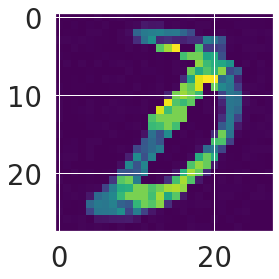

In [20]:
a = np.array(new_data('D', 3)).astype(int)


#print(np.shape(a))
 
a = a.reshape(28,28)
    
    
plt.imshow(a, cmap='viridis')
plt.show()

In [643]:
a= 80
b= random.sample(range(a), 10)
b

[20, 28, 51, 25, 60, 23, 72, 27, 5, 77]

In [ ]:
a = np.array(new_data('A')).astype(int)

print(np.shape(a))
     
# plt.imshow(a, cmap='viridis')
# plt.show()

In [140]:
# lst_digit
num_str = str(4)
digit = train.query("digit =="+ '"' + num_str + '"')
count_num = (train['digit']==num).value_counts()[True]
    
    
lst_digit = []
temp_digit = np.zeros((28,28))
    
for i in range(3):
        
    if i!=0 and i%2 == 0:
        
        temp_digit = temp_digit.ravel()
        
        for index, value in enumerate(temp_digit):
            if value > 255:
                temp_digit[index] = int(value/2)
                
        temp_digit = temp_digit.reshape(28,28)
        lst_digit.append(temp_digit)
        temp_digit = np.zeros((28,28))
        
    img = digit.iloc[i, 3:].values.reshape(28, 28)

    res, mask_hole = K_means(img)
    res = np.where(res==mask_hole, img, 0)

    temp_digit = temp_digit + res

lst_digit

[array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 172.0, 174.0, 0.0, 0.0, 0.0, 0.0,
         0.0,

In [126]:

a= np.array(temp_digit).reshape(1, 28*28)
temp_digit = a.tolist()
for index, value in enumerate(temp_digit):
    if value > 255:
        temp_digit[index] = value/2
    
temp_digit

TypeError: '>' not supported between instances of 'list' and 'int'

In [94]:
list = [1,2,3,4,5]

for i in list:
    if i > 2:
        list[i] = i/2
    
list

IndexError: list assignment index out of range

In [134]:
list = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 172.0, 174.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 219.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 190.0, 215.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 215.0, 194.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 186.0, 227.0, 187.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 210.0, 466.0, 198.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 461.0, 490.0, 386.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 484.0, 465.0, 222.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 194.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 178.0, 486.0, 423.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 235.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 243.0, 250.0,
        254.0, 245.0, 248.0, 495.0, 484.0, 221.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 237.0, 197.0, 0.0, 0.0, 0.0, 0.0, 0.0, 226.0,
        244.0, 253.0, 463.0, 500.0, 498.0, 428.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 226.0, 252.0, 211.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        445.0, 494.0, 485.0, 213.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 254.0, 255.0, 240.0, 239.0, 236.0, 235.0,
        250.0, 246.0, 217.0, 220.0, 251.0, 193.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 211.0, 252.0, 255.0, 254.0, 255.0, 255.0,
        244.0, 194.0, 0.0, 234.0, 234.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 179.0, 192.0, 186.0, 0.0, 0.0, 0.0,
        176.0, 236.0, 213.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        237.0, 235.0, 185.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 197.0,
        252.0, 228.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 233.0,
        253.0, 208.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 214.0,
        225.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        176.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0]]

list = np.array(list).ravel()

for index, value in enumerate(list):
    if value > 255:
        list[index] = int(value/2)

list

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [98]:
list = [1,2,3,4,5]
for index, value in enumerate(list):
    print(value)

1
2
3
4
5


In [203]:
num = 4
num_str = str(num)
digit = train.query("digit =="+ '"' + num_str + '"')
digit

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
24,25,4,U,2,2,3,3,2,0,0,...,4,2,2,4,0,2,3,2,4,0
37,38,4,K,0,4,4,3,4,0,1,...,3,0,0,0,1,3,4,4,0,1
59,60,4,Y,4,3,2,0,3,4,4,...,4,2,4,2,3,1,1,0,1,1
66,67,4,R,2,0,3,4,1,0,3,...,4,4,2,4,0,4,4,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,2001,4,I,2,2,3,4,2,1,3,...,0,1,1,3,0,1,3,3,1,0
2007,2008,4,B,1,3,2,0,1,1,2,...,3,1,3,0,0,3,1,3,3,0
2030,2031,4,S,0,1,4,1,3,0,1,...,3,2,3,3,4,2,3,4,3,4
2036,2037,4,M,3,3,4,2,4,1,4,...,3,1,0,4,2,0,3,4,1,3


In [201]:
num = 4
count_num = (train['digit']==num).value_counts()[True]
count_num

207

In [183]:
digit_4 = train.query("digit == 4")
digit_4

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
24,25,4,U,2,2,3,3,2,0,0,...,4,2,2,4,0,2,3,2,4,0
37,38,4,K,0,4,4,3,4,0,1,...,3,0,0,0,1,3,4,4,0,1
59,60,4,Y,4,3,2,0,3,4,4,...,4,2,4,2,3,1,1,0,1,1
66,67,4,R,2,0,3,4,1,0,3,...,4,4,2,4,0,4,4,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,2001,4,I,2,2,3,4,2,1,3,...,0,1,1,3,0,1,3,3,1,0
2007,2008,4,B,1,3,2,0,1,1,2,...,3,1,3,0,0,3,1,3,3,0
2030,2031,4,S,0,1,4,1,3,0,1,...,3,2,3,3,4,2,3,4,3,4
2036,2037,4,M,3,3,4,2,4,1,4,...,3,1,0,4,2,0,3,4,1,3


# Mask_0 함수 정의

In [89]:
# 원본이미지가 입력되었을 때 Segmentation된 이미지의 digt 부분을 0마스크로 만드는 함수 생성
# mode가 mask_0일땐 digit가 0 배경이 1인 마스크 생성, 그 외는 digit이 1 배경이 0인 마스크 생성

def digit_mask(img, mode):
    
    #입력 데이터를 단일 열(column) 벡터로 구성 후 float32 타입으로 변경
    # 각 특징은 열로 정렬되어 있어야 K mean 함수 사용가능
    img_flatten = img.reshape((-1,1))
    img_flatten = np.float32(img_flatten)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 3
    ret,label,center=cv2.kmeans(img_flatten, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape(28,28)
    
    # digit에 해당하는 부분만을 mask로 생성
    mask_hole=np.array(center).max() # digit 부분은 항상 max value이다.

    
    if mode == 'mask_0':
        sub_res = np.where(res==mask_hole, 0, 1) # digit 부분은 0, 나머지 배경은 1

    else:
        sub_res = np.where(sub_res==mask_hole, 1, 0)

        
    return sub_res

# 알파벳의 모든 이미지를 더해서 평균 알파벳 이미지 생성

In [56]:
# 나중에 최종 클래스를 만들땐 lst_letter와 알파벳을 동시에 넣을 수 있도록 만들어줘야 할듯

lst_letter = ["letter == 'A'", "letter == 'B'", "letter == 'C'", "letter == 'D'", "letter == 'E'", "letter == 'F'",
             "letter == 'G'", "letter == 'H'", "letter == 'I'", "letter == 'J'", "letter == 'K'", "letter == 'L'",
             "letter == 'M'","letter == 'N'","letter == 'O'","letter == 'P'","letter == 'Q'","letter == 'R'","letter == 'S'",
             "letter == 'T'","letter == 'U'","letter == 'V'""letter == 'W'","letter == 'X'","letter == 'Y'", "letter == 'Z'"]
# letter = train.query(lst_letter)

letter = train.query("letter == 'A'")
letter

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
17,18,7,A,2,3,0,4,0,0,1,...,1,2,0,0,1,0,2,2,1,4
44,45,5,A,2,0,4,2,3,1,3,...,3,1,2,0,4,2,3,4,1,1
75,76,7,A,1,0,4,1,4,1,1,...,0,4,0,4,3,2,4,1,2,2
105,106,2,A,4,2,4,1,0,4,3,...,0,2,0,2,4,3,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,1965,1,A,3,2,0,3,0,2,1,...,3,4,3,1,4,4,1,2,3,2
1967,1968,5,A,0,2,0,0,3,1,3,...,1,1,2,2,3,0,3,1,4,2
2010,2011,9,A,3,1,1,1,0,1,4,...,1,0,3,0,4,3,1,0,2,3
2011,2012,9,A,4,3,3,0,3,0,2,...,4,2,0,1,3,3,4,0,1,3


In [ ]:
def letter_generate(alphabet):
    
    # 각 알파벳에 몇 개의 데이터가 있는지 갯수를 센다.
    count = (train['letter']==alphabet).value_counts()[True]
    
    # 평균 알파벳 이미지의 영행렬을 생성
    new_letter = np.zeros((28,28))

    
    for i in range(0, count):
        img = letter.iloc[i, 3:].values.reshape(28, 28)

        #입력 데이터를 단일 열(column) 벡터로 구성. 각 특징은 열로 정렬되어 있어야 K mean 함수 사용가능
        img_flatten = img.reshape((-1,1))
        img_flatten = np.float32(img_flatten)

        # define criteria, number of clusters(K) and apply kmeans()
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        K = 3
        ret,label,center=cv2.kmeans(img_flatten,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

        # Now convert back into uint8, and make original image
        center = np.uint8(center)
        res = center[label.flatten()]
        res = res.reshape(28,28)

        # letter와 숫자가 겹치는 부분을 0으로 만들 마스크를 준비한다.
        mask_hole=np.array(center).max()
        res = np.where(res==mask_hole, 0, 1)
        masked_img = img*mask_0

        # 구멍뚫린 letter 이미지를 모두 더한다.
        new_letter = new_letter + masked_img

    new_letter = (new_letter/(count/2).astype(int)
    
    return new_letter

# 숫자별로 더한 새로운 digit 세그멘테이션 생성

In [ ]:
# lst_digit

digit = train.query("digit == '4'")
    

In [ ]:
def digit_seg(num):
    

    
    new_digit = np.zeros((28,28))

    img = digit.iloc[num, 3:].values.reshape(28, 28)

    #입력 데이터를 단일 열(column) 벡터로 구성. 각 특징은 열로 정렬되어 있어야 K mean 함수 사용가능
    img_flatten = img.reshape((-1,1))
    img_flatten = np.float32(img_flatten)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 3
    ret,label,center=cv2.kmeans(img_flatten,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape(28,28)

    # letter와 숫자가 겹치는 부분을 0으로 만들 마스크를 준비한다.
    mask_hole=np.array(center).max()

    res = np.where(res==mask_hole, 1, 0)

    return res
    

In [ ]:
for i in range(count):
    
    i=2*i+1
    
    # 구멍뚫린 letter 이미지를 모두 더한다.
    new_seg = digit_seg(i-1) + digt_seg(i)
    new_letter = (new_letter/2).astype(int)
    

In [73]:
# 각 알파벳에 몇 개의 데이터가 있는지 갯수를 센다.
count = (train['digit']==alphabet).value_counts()[True]
count=10

for i in range(count):
    i= 2*i+1
    print(i-1), print(i)
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [86]:
count=10

for i in range(count):
    i= 2*i+1
    for j in range(i, i+1):
        print(i-1), print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


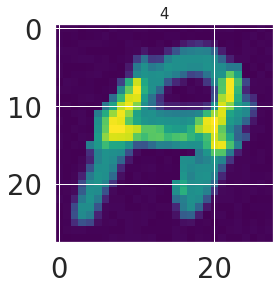

In [93]:
# 영어글자 A, 숫자 4라는 데이터를 이용해 데이터 증강 시도

img = train.query("letter == 'A'")[[(str(i)) for i in range(784)]].iloc[28].values.reshape(28, 28)
plt.imshow(img, cmap='viridis')
plt.title(train.query("letter == 'A'").iloc[28]['digit'], fontsize=15)
plt.show()

In [94]:
#입력 데이터를 단일 열(column) 벡터로 구성. 각 특징은 열로 정렬되어 있어야 K mean 함수 사용가능
img_flatten = img.reshape((-1,1))
img_flatten = np.float32(img_flatten)

In [95]:
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(img_flatten,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

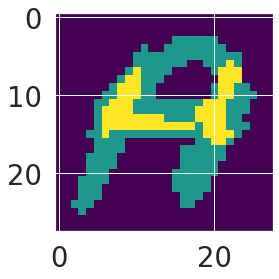

In [96]:
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape(28,28)

plt.imshow(res, cmap='viridis')
plt.show()

K = 3과 5로 해서 비교해봤는데 3으로해서 하던지 아니면 5로 한뒤 4,5클러스터를 제외하는 것으로 하는게 맞아보인다.

In [97]:
# letter와 숫자가 겹치는 부분을 0으로 만들 마스크를 준비한다.
mask_hole=np.array(center).max()

print(center)
print(mask_hole)

[[116]
 [213]
 [  5]]
213


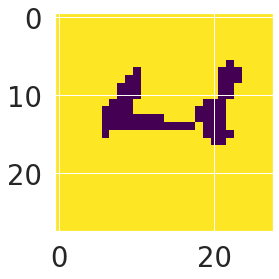

In [98]:
sub_res = res
sub_res = np.where(sub_res==mask_hole, 0, 1)
mask_0=sub_res.reshape(28, 28)

plt.imshow(mask_0, cmap='viridis')
plt.show()

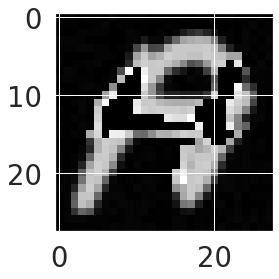

In [99]:
masked_img = img*mask_0
masked_img = masked_img.reshape(28,28)

plt.imshow(masked_img, cmap='gray')
plt.show()

In [10]:
i = 'A' 이게 안되서... 계속 이어서 써나가는 수박에 없을듯

lst = ["letter == ", ~~]

또는
letter_A = train.query("letter == 'A'")
letter_B = train.query("letter == 'B'")
...

In [147]:
letter_A = train.query("letter == 'A'")
letter_A

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
17,18,7,A,2,3,0,4,0,0,1,...,1,2,0,0,1,0,2,2,1,4
44,45,5,A,2,0,4,2,3,1,3,...,3,1,2,0,4,2,3,4,1,1
75,76,7,A,1,0,4,1,4,1,1,...,0,4,0,4,3,2,4,1,2,2
105,106,2,A,4,2,4,1,0,4,3,...,0,2,0,2,4,3,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,1965,1,A,3,2,0,3,0,2,1,...,3,4,3,1,4,4,1,2,3,2
1967,1968,5,A,0,2,0,0,3,1,3,...,1,1,2,2,3,0,3,1,4,2
2010,2011,9,A,3,1,1,1,0,1,4,...,1,0,3,0,4,3,1,0,2,3
2011,2012,9,A,4,3,3,0,3,0,2,...,4,2,0,1,3,3,4,0,1,3


In [148]:
(train['letter']=='A').value_counts()[True]


72

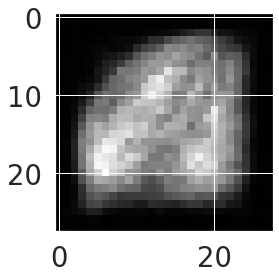

In [149]:
new_letter = np.zeros((28,28))

for i in range(0,72):
    img = letter_A.iloc[i, 3:].values.reshape(28, 28)
    
    #입력 데이터를 단일 열(column) 벡터로 구성. 각 특징은 열로 정렬되어 있어야 K mean 함수 사용가능
    img_flatten = img.reshape((-1,1))
    img_flatten = np.float32(img_flatten)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 3
    ret,label,center=cv2.kmeans(img_flatten,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape(28,28)

    # letter와 숫자가 겹치는 부분을 0으로 만들 마스크를 준비한다.
    mask_hole=np.array(center).max()

    sub_res = res
    sub_res = np.where(sub_res==mask_hole, 0, 1)
    mask_0=sub_res.reshape(28, 28)

    masked_img = img*mask_0
    masked_img = masked_img.reshape(28,28)

    # 구멍뚫린 letter 이미지를 모두 더한다.
    new_letter = new_letter + masked_img

new_letter = (new_letter/30).astype(int)

plt.imshow(new_letter, cmap='gray')
plt.show()

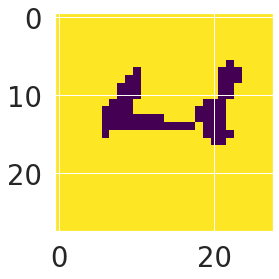

In [101]:
sub_res = res
sub_res = np.where(sub_res==mask_hole, 1, 0)
mask_1=sub_res.reshape(28, 28)

plt.imshow(mask_0, cmap='viridis')
plt.show()

In [102]:
mask_1

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 

In [103]:
new_img = new_letter*mask_1
new_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

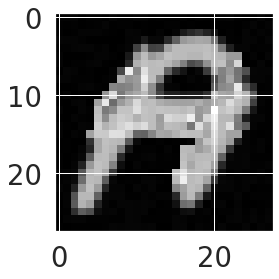

In [104]:
new_new_img=masked_img + new_img

plt.imshow(new_new_img, cmap='gray')
plt.show()

In [178]:
digit_4 = train.query("digit == '4'")
digit_4

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [53]:
new_letter = np.zeros((28,28))


for i in range(0,2):
    img = digit_4.iloc[i, 3:].values.reshape(28, 28)
    
    #입력 데이터를 단일 열(column) 벡터로 구성. 각 특징은 열로 정렬되어 있어야 K mean 함수 사용가능
    img_flatten = img.reshape((-1,1))
    img_flatten = np.float32(img_flatten)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 3
    ret,label,center=cv2.kmeans(img_flatten,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape(28,28)

    # letter와 숫자가 겹치는 부분을 0으로 만들 마스크를 준비한다.
    mask_hole=np.array(center).max()

    sub_res = res
    sub_res = np.where(sub_res==mask_hole, 1, 0)
    mask_0=sub_res.reshape(28, 28)

    masked_img = img*mask_0
    masked_img = masked_img.reshape(28,28)

    # 구멍뚫린 letter 이미지를 모두 더한다.
    new_letter = new_letter + masked_img

new_letter = (new_letter/2).astype(int)


plt.imshow(new_letter, cmap='gray')
plt.show()

NameError: name 'digit_4' is not defined

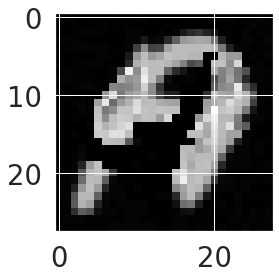

In [128]:
new_mask_0 = np.zeros((28,28))


for i in range(0,2):
    img = digit_4.iloc[i, 3:].values.reshape(28, 28)
    
    #입력 데이터를 단일 열(column) 벡터로 구성. 각 특징은 열로 정렬되어 있어야 K mean 함수 사용가능
    img_flatten = img.reshape((-1,1))
    img_flatten = np.float32(img_flatten)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 3
    ret,label,center=cv2.kmeans(img_flatten,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape(28,28)

    # letter와 숫자가 겹치는 부분을 0으로 만들 마스크를 준비한다.
    mask_hole=np.array(center).max()

    sub_res = res
    sub_res = np.where(sub_res==mask_hole, 0, 1)
    mask_0=sub_res.reshape(28, 28)

    new_new_img = new_new_img*mask_0


plt.imshow(new_new_img, cmap='gray')
plt.show()


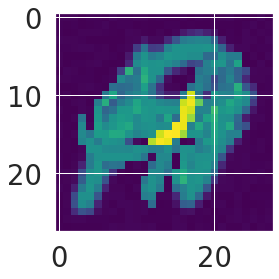

In [130]:
new_letter_mask = new_new_img + new_letter
plt.imshow(new_letter_mask, cmap='viridis')
plt.show()

In [ ]:
    #입력 데이터를 단일 열(column) 벡터로 구성. 각 특징은 열로 정렬되어 있어야 K mean 함수 사용가능
    img_flatten = img.reshape((-1,1))
    img_flatten = np.float32(img_flatten)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 3
    ret,label,center=cv2.kmeans(img_flatten,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape(28,28)